In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Josepa Cusidó\092022 Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_and_Products_merged.pkl'))

<AxesSubplot:>

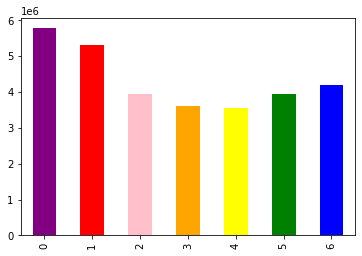

In [4]:
# Create Bar Chart
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

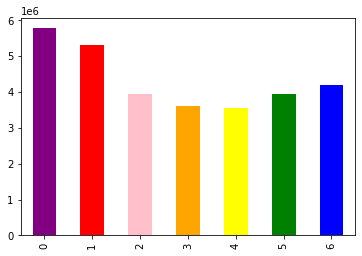

In [5]:
bar1 = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
# Exporting bar chart
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

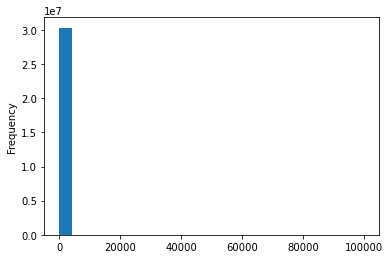

In [7]:
# Create Histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

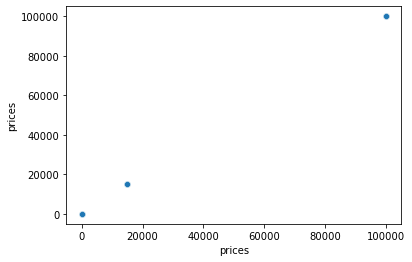

In [8]:
# Create a Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [9]:
# Checking for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_prior_order,frecuency_flag
8960343,912404,17,12,2,14,5.0,21553,5,0,21554,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,109.670103,High spender,5.0,Frequent customer
8960344,603376,17,22,6,16,4.0,21553,3,1,21554,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,109.670103,High spender,5.0,Frequent customer
8960345,3264360,135,2,2,21,13.0,21553,6,0,21554,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1250.245833,High spender,12.0,Regular customer
8960346,892534,135,3,0,8,12.0,21553,3,1,21554,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1250.245833,High spender,12.0,Regular customer
8960347,229704,342,8,1,19,30.0,21553,9,0,21554,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,120.090909,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27128304,2249946,204099,29,0,8,4.0,33664,1,0,33666,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1137.802260,High spender,4.0,Frequent customer
27128305,2363282,204099,31,0,9,2.0,33664,1,1,33666,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1137.802260,High spender,4.0,Frequent customer
27128306,3181945,204395,13,3,15,8.0,33664,25,0,33666,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,487.075120,High spender,5.0,Frequent customer
27128307,2486215,205227,7,3,20,4.0,33664,8,0,33666,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1235.679755,High spender,12.0,Regular customer


In [10]:
# Marking outliers as missing data
ords_prods_merg = ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [11]:
ords_prods_merge['prices'].max()

25.0

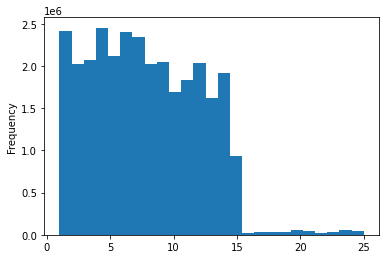

In [12]:
hist_prices25 = ords_prods_merge['prices'].plot.hist(bins = 25)

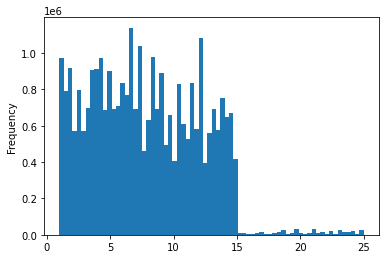

In [13]:
hist_prices70 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [14]:
hist_prices25.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_25.png'))

In [15]:
hist_prices70.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_70.png'))

In [16]:
# Create a list holding True/ False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [17]:
dev

array([False,  True, False, ...,  True, False,  True])

In [18]:
# Store 70% of the sample in the df big
big = ords_prods_merge[dev]

In [19]:
# Store 30% of the sample in the df small
small = ords_prods_merge[~dev]

In [20]:
len(ords_prods_merge)

30328763

In [21]:
len(big) + len(small)

30328763

In [22]:
df_2 = small[['orders_day_of_week','prices']]

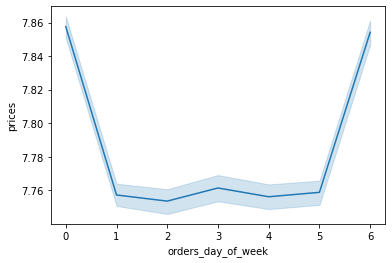

In [23]:
# Create a line chart
line_dowprices = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [24]:
line_dowprices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_orders-dow.png'))

# Part 2

<AxesSubplot:ylabel='Frequency'>

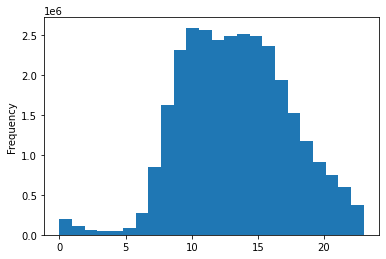

In [25]:
# Create a histogram with order hour of day
ords_prods_merge['order_time'].plot.hist(bins = 24)

The histogram shows that the busiest time of the day is between 9h and 17h, regular working hours. 

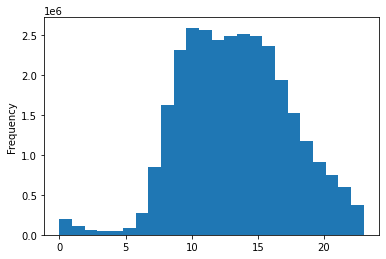

In [26]:
hist_ordertime = ords_prods_merge['order_time'].plot.hist(bins = 24)

In [27]:
hist_ordertime.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order-time.png'))

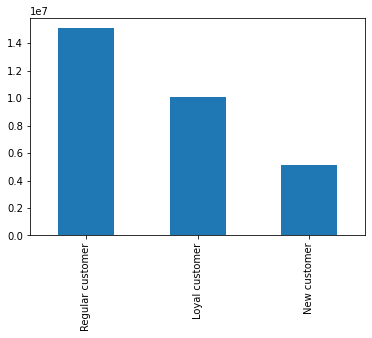

In [28]:
# Create a Bar chart
bar_loyalty = ords_prods_merge['loyalty_flag'].value_counts().plot.bar()

In [29]:
df_2 = small[['order_time','prices']]

In [30]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

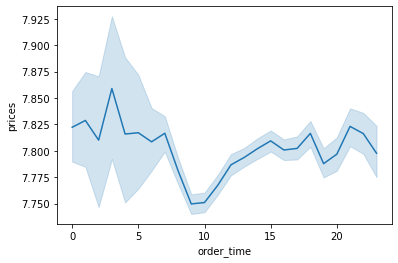

In [31]:
# Create a line chart
line_expenditure = sns.lineplot(data = df_2, x = 'order_time',y = 'prices')

The line chart shows that the expenditure is higher from 2 to 4 and has a low from 9 to 10. 

In [32]:
line_expenditure.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditure.png'))

In [33]:
#Exporting Data
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Orders_and_Products_merged.pkl'))